D:\Python\AI\pythonProject\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Python\AI\pythonProject\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\35351\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\35351\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\35351\AppData\Local\Programs\

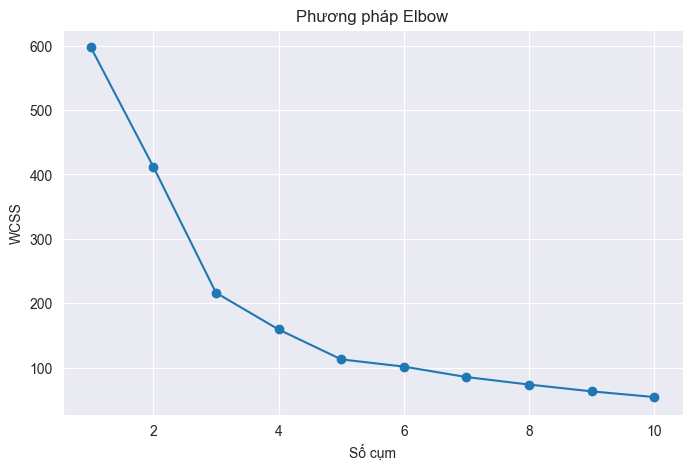

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('Data/Dataa.csv')

# # Chuyển đổi các cột string thành số
# df['sex'] = df['sex'].map({'female': 0, 'male': 1})
# df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
# df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Lấy các cột cần chuẩn hóa
data_to_scale = df[['age', 'serum_creatinine']]

# Chuẩn hóa dữ liệu
sc = StandardScaler()
data_stand = sc.fit_transform(data_to_scale)

# Chuyển đổi dữ liệu đã chuẩn hóa thành dataframe
data_stand = pd.DataFrame(data_stand, columns=['age', 'serum_creatinine'])

# Tìm số cụm thích hợp bằng phương pháp "elbow"
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_stand)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Phương pháp Elbow')
plt.xlabel('Số cụm')
plt.ylabel('WCSS')
plt.show()


        age  serum_creatinine  cluster
0  1.192758          0.490057        2
1 -0.491467         -0.284552        0
2  0.350645         -0.090900        2
3 -0.912523          0.490057        0
4  0.350645          1.264666        2


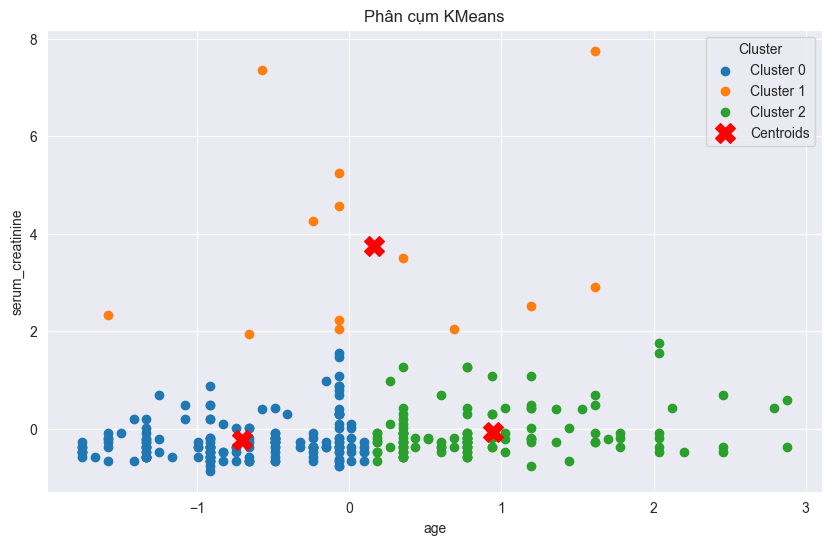

In [2]:
kmeans = KMeans(n_clusters=3, random_state=42)
data_stand['cluster'] = kmeans.fit_predict(data_stand)

# Hiển thị kết quả phân cụm
print(data_stand.head())

# Biểu thị các cụm lên bằng biểu đồ scatter
plt.figure(figsize=(10, 6))

# Tạo các mảng tương ứng với mỗi cụm
for cluster in range(3):
    cluster_data = data_stand[data_stand['cluster'] == cluster]
    plt.scatter(cluster_data['age'], cluster_data['serum_creatinine'], label=f'Cluster {cluster}')

# Hiển thị các tâm của các cụm
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroids')

plt.title('Phân cụm KMeans')
plt.xlabel('age')
plt.ylabel('serum_creatinine')
plt.legend(title='Cluster', loc='upper right')
plt.show()